In [131]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [132]:
from prometheus_api_client import PrometheusConnect

In [133]:
#change this host for a different host
prom = PrometheusConnect(url ="http://demo.robustperception.io:9090/", disable_ssl=True)
metric = prom.custom_query('node_load15[1d:1m]')
metric

[{'metric': {'__name__': 'node_load15',
   'instance': 'demo.robustperception.io:9100',
   'job': 'node'},
  'values': [[1626543300, '0.84'],
   [1626543360, '0.86'],
   [1626543420, '0.85'],
   [1626543480, '0.85'],
   [1626543540, '0.83'],
   [1626543600, '0.81'],
   [1626543660, '0.83'],
   [1626543720, '0.81'],
   [1626543780, '0.81'],
   [1626543840, '0.8'],
   [1626543900, '0.8'],
   [1626543960, '0.81'],
   [1626544020, '0.8'],
   [1626544080, '0.79'],
   [1626544140, '0.77'],
   [1626544200, '0.78'],
   [1626544260, '0.77'],
   [1626544320, '0.75'],
   [1626544380, '0.74'],
   [1626544440, '0.75'],
   [1626544500, '0.78'],
   [1626544560, '0.81'],
   [1626544620, '0.83'],
   [1626544680, '0.83'],
   [1626544740, '0.82'],
   [1626544800, '0.81'],
   [1626544860, '0.79'],
   [1626544920, '0.79'],
   [1626544980, '0.77'],
   [1626545040, '0.77'],
   [1626545100, '0.76'],
   [1626545160, '0.77'],
   [1626545220, '0.8'],
   [1626545280, '0.79'],
   [1626545340, '0.77'],
   [16265454

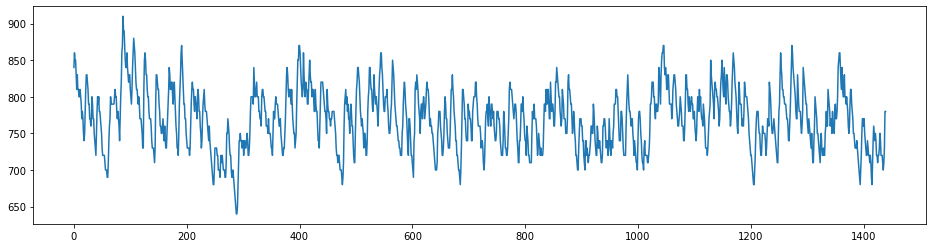

In [134]:
#creating our dataframe
plt.figure(figsize=(16,4))
data=[]
for val in metric[0]["values"]:
    unix_time=datetime.datetime.utcfromtimestamp(int(val[0])) # This makes the unix time to UTC datatime object
    data.append([unix_time,float(val[1])*10**3])
df = pd.DataFrame(data, columns=['time','value']) # creating out dataframe
plt.plot(df.value)

<AxesSubplot:xlabel='time'>

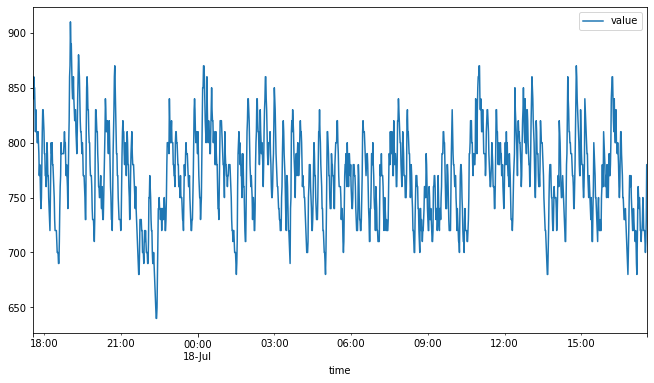

In [135]:
df.set_index("time",inplace=True)
df.plot()

In [136]:
df.head()

,value
time,
2021-07-17 17:35:00,840.0
2021-07-17 17:36:00,860.0
2021-07-17 17:37:00,850.0
2021-07-17 17:38:00,850.0
2021-07-17 17:39:00,830.0


In [137]:
df['v-1']=df['value'].shift(+1)
df['v-2']=df['value'].shift(+2)
df['v-3']=df['value'].shift(+3)
df['v-4']=df['value'].shift(+4)
df['v-5']=df['value'].shift(+5)
df['v-6']=df['value'].shift(+6)
df

,value,v-1,v-2,v-3,v-4,v-5,v-6
time,,,,,,,
2021-07-17 17:35:00,840.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-17 17:36:00,860.0,840.0,NaN,NaN,NaN,NaN,NaN
2021-07-17 17:37:00,850.0,860.0,840.0,NaN,NaN,NaN,NaN
2021-07-17 17:38:00,850.0,850.0,860.0,840.0,NaN,NaN,NaN
2021-07-17 17:39:00,830.0,850.0,850.0,860.0,840.0,NaN,NaN
...,...,...,...,...,...,...,...
2021-07-18 17:30:00,700.0,710.0,720.0,720.0,720.0,740.0,750.0
2021-07-18 17:31:00,710.0,700.0,710.0,720.0,720.0,720.0,740.0
2021-07-18 17:32:00,730.0,710.0,700.0,710.0,720.0,720.0,720.0


In [138]:
df=df.dropna()
df

,value,v-1,v-2,v-3,v-4,v-5,v-6
time,,,,,,,
2021-07-17 17:41:00,830.0,810.0,830.0,850.0,850.0,860.0,840.0
2021-07-17 17:42:00,810.0,830.0,810.0,830.0,850.0,850.0,860.0
2021-07-17 17:43:00,810.0,810.0,830.0,810.0,830.0,850.0,850.0
2021-07-17 17:44:00,800.0,810.0,810.0,830.0,810.0,830.0,850.0
2021-07-17 17:45:00,800.0,800.0,810.0,810.0,830.0,810.0,830.0
...,...,...,...,...,...,...,...
2021-07-18 17:30:00,700.0,710.0,720.0,720.0,720.0,740.0,750.0
2021-07-18 17:31:00,710.0,700.0,710.0,720.0,720.0,720.0,740.0
2021-07-18 17:32:00,730.0,710.0,700.0,710.0,720.0,720.0,720.0


In [139]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [140]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=6, random_state=1)

In [141]:
x1,x2,x3,x4,x5,x6,y=df['v-1'],df['v-2'],df['v-3'],df['v-4'],df['v-5'],df['v-6'],df['value']


In [142]:
x1,x2,x3,x4,x5,x6,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(y)
x1,x2,x3,x4,x5,x6,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4,x5,x6),axis=1)
print(final_x)

[[810. 830. 850. 850. 860. 840.]
 [830. 810. 830. 850. 850. 860.]
 [810. 830. 810. 830. 850. 850.]
 ...
 [710. 700. 710. 720. 720. 720.]
 [730. 710. 700. 710. 720. 720.]
 [780. 730. 710. 700. 710. 720.]]


In [143]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]


In [144]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

<ipython-input-144-293373e02e7d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


LinearRegression()

In [145]:
# Absolute Percentage Errors
def mape(actual, pred):
    cnt = 0
    for i in range(len(actual)):
        sum = (abs(actual[i] - pred[i]) / actual[i]) * 100
        if (sum <= 1):
            cnt += 1

    return (cnt / len(actual)) * 100

In [155]:
#Mean Absolute Error
def mae(actual,pred):
    sum=0
    for i in range (len(actual)):
        sum=sum+abs(actual[i] - pred[i])

    return sum/len(actual)

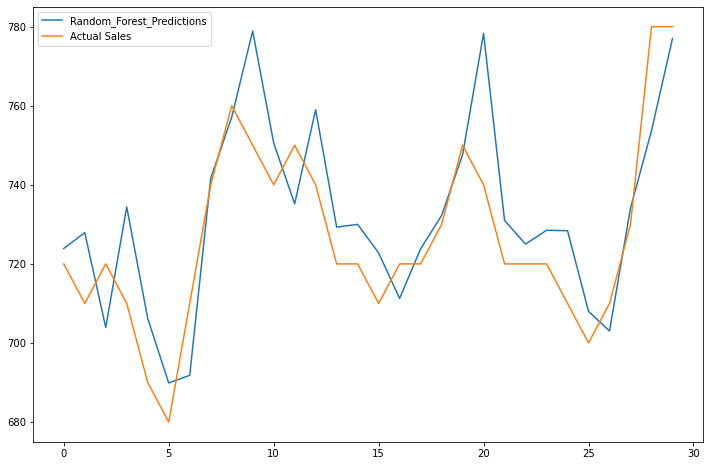

In [156]:
# prediction of testing data
pred=model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [157]:
# future prediction using random forest
current_batch_rf=[X_test[-1]]
# pred_val=model.predict(current_batch_rf)
# print(pred_val)

pred_store_rf=[]
for i in range(len(X_test)):
    pred_val=model.predict(current_batch_rf)
    pred_store_rf.append(pred_val[0])
    current_batch_rf=np.append(current_batch_rf,[pred_val],axis=1)
    current_batch_rf= np.delete(current_batch_rf, (0), axis=1)
print(y_test,pred_store_rf)

[[720.]
 [710.]
 [720.]
 [710.]
 [690.]
 [680.]
 [710.]
 [740.]
 [760.]
 [750.]
 [740.]
 [750.]
 [740.]
 [720.]
 [720.]
 [710.]
 [720.]
 [720.]
 [730.]
 [750.]
 [740.]
 [720.]
 [720.]
 [720.]
 [710.]
 [700.]
 [710.]
 [730.]
 [780.]
 [780.]] [777.0, 749.7, 740.3400000000001, 719.6, 708.4316666666667, 723.0, 777.7, 769.6, 753.7, 733.2716666666668, 715.1233333333334, 725.5, 784.5, 780.4, 765.1, 743.7, 728.3, 729.3, 783.4, 795.4, 787.2, 745.2333333333332, 731.1, 725.9, 798.2, 803.7, 802.6, 766.2, 736.5, 730.0]


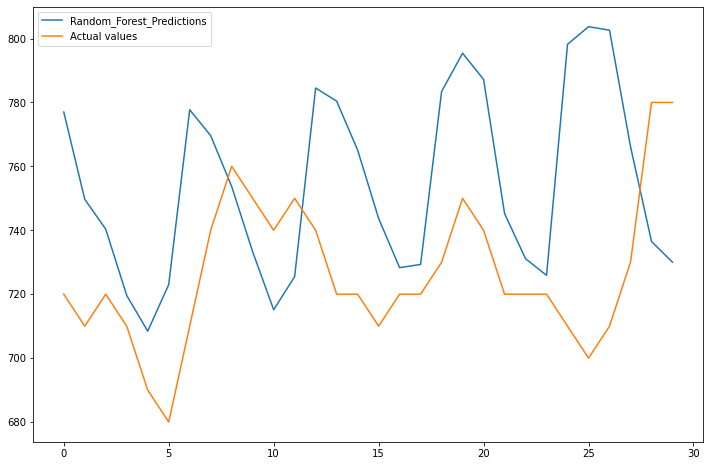

6.666666666666667
mean absolute error [38.717]


In [158]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred_store_rf,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual values')
plt.legend(loc="upper left")
plt.show()
print(mape(y_test,pred_store_rf))
print("mean absolute error",mae(y_test,pred_store_rf))

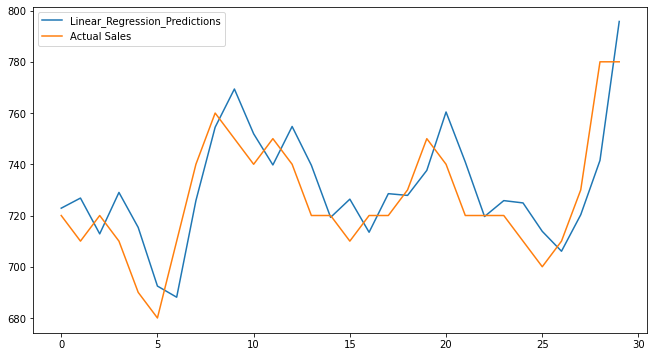

In [159]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()
current_batch=[X_test[-1]]

In [160]:
# future prediction using Linera regression
pred_store=[]
for i in range(len(X_test)):
    pred_val=lin_model.predict(current_batch)
    pred_store.append(pred_val[0][0])
    current_batch=np.append(current_batch,pred_val,axis=1)
    current_batch= np.delete(current_batch, (0), axis=1)
pred_store

[795.7470504016586,
 745.4529924862607,
 714.0651930618955,
 706.5560291361045,
 711.2490700342261,
 704.594320329869,
 809.5964867287784,
 764.7973342793531,
 715.8018917640475,
 713.9174348851799,
 717.4886978447973,
 680.9387131243229,
 819.3635091913994,
 790.2905626528002,
 714.4917296354726,
 720.3461626738904,
 732.806074543316,
 648.5555361023111,
 821.3231664308847,
 825.0229184447991,
 710.0187385673999,
 722.1412670765678,
 762.4383580417568,
 608.348090863826,
 809.487475436451,
 872.8412786866056,
 703.8036486796929,
 712.7309211976562,
 812.4937145180985,
 563.8689216340217]

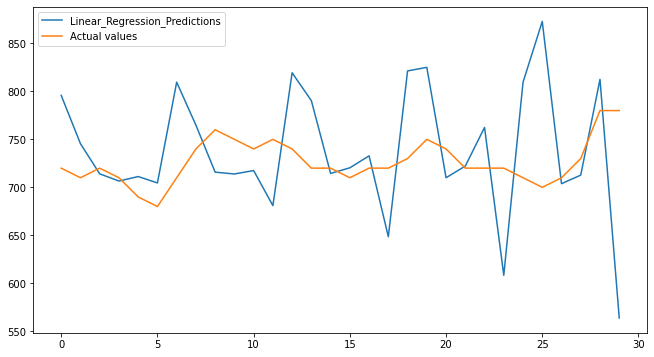

In [161]:
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(pred_store,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual values')
plt.legend(loc="upper left")
plt.show()

In [162]:
mape(y_test,pred_store)

16.666666666666664

In [163]:
print("mean absolute error",mae(y_test,pred_store))

mean absolute error [53.64687318]
